In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## Описание данных

### Построение гистограмм, выбор количества бинов

1) Можно выбирать количество бинов
2) Можно выбирать автоматический алгоритм

### Ядерные оценки



## Что такое точечные и интервальные оценки

Выборочные характеристики для среднего и дисперсии

## Свойства оценок

### Несмещённость

### Сосстоятельность (plim и дисперсию)

### Относительная эффективность

### Неравенство Рао-Крамера и эффективные оценки

## Методы получения оценок

### Метод максимального правдоподобия

### Метод моментов *

## Интервальные оценки (доверительные интервалы)

Мы строим оценку для параметра распределения (не обязательно конкретного параметра, можно для момента). Можно её строить как угодно, но для интервальной оценки нам важно чтобы статистика была как-то распределена.

### 1) Статистика имеет конкретное распределение, которое мы смогли вывести (хорошо изученное), явное или численное

### 2) Не смогли вывести распределение. 
Можем построить уже не любую статистику, а некоторый небольшой набор конкретных статистик, которые сходятся к известным распределениям (ЦПТ)

#### а. Выборка нормальна

#### b. Есть асимптотика (выборка может быть нормальной или нет)

Пример -- Бернулли

## Проверка гипотез

### Что такое гипотеза

### Какие бывают гипотезы

### Почему нулевая гипотеза почти всегда простая


### Что такое критерий

Пример про две простые гипотезы с нормальными плотностями

### Ошибки первого и второго рода, как выбирать критерий на основе стоимости ошибки

### Стандартные тесты, z-тест, t-тест

### Специальные тесты (хи-квадрать, F, дельта-метод)

### Обзорно про непараметрические тесты

В качестве примера рассмотрим потребительские расходы на здравоохранение по регионам России за 2022 и 2023 годы. Они представлены в руб./мес. в среднем на члена 
домашнего хозяйств.

Источник данных: Росстат, Приложение 1. "Доходы, расходы и потребление домашних хозяйств по субъектам 
Российской Федераци", лист 1.4и
https://rosstat.gov.ru/storage/mediabank/Dohod_rashod_potreblen_3k-2023.htm

In [2]:
data = pd.read_excel("data.xlsx", sheet_name = "Data", index_col=0)
data.index.name = "region"

data

,expense_3q2022,expense_3q2023,healthP_3q2022,healthP_3q2023,health_3q2022,health_3q2023
region,,,,,,
Белгородская область,21914.398,25241.122,2.568850,2.994974,562.948,755.965
Брянская область,18265.001,19635.899,2.933966,3.079054,535.889,604.600
Владимирская область,19813.828,23137.913,3.588756,3.879473,711.070,897.629
Воронежская область,17621.889,19502.166,4.558280,4.991471,803.255,973.445
Ивановская область,21681.452,23090.981,4.420234,5.235269,958.371,1208.875
...,...,...,...,...,...,...
Амурская область,19586.108,21720.673,5.966755,3.962138,1168.655,860.603
Магаданская область,36153.698,64866.434,3.411275,1.548055,1233.302,1004.168
Сахалинская область,32652.890,32761.952,3.462753,4.333130,1130.689,1419.618


In [3]:
#number of observations in each year
n = len(data)
n

82

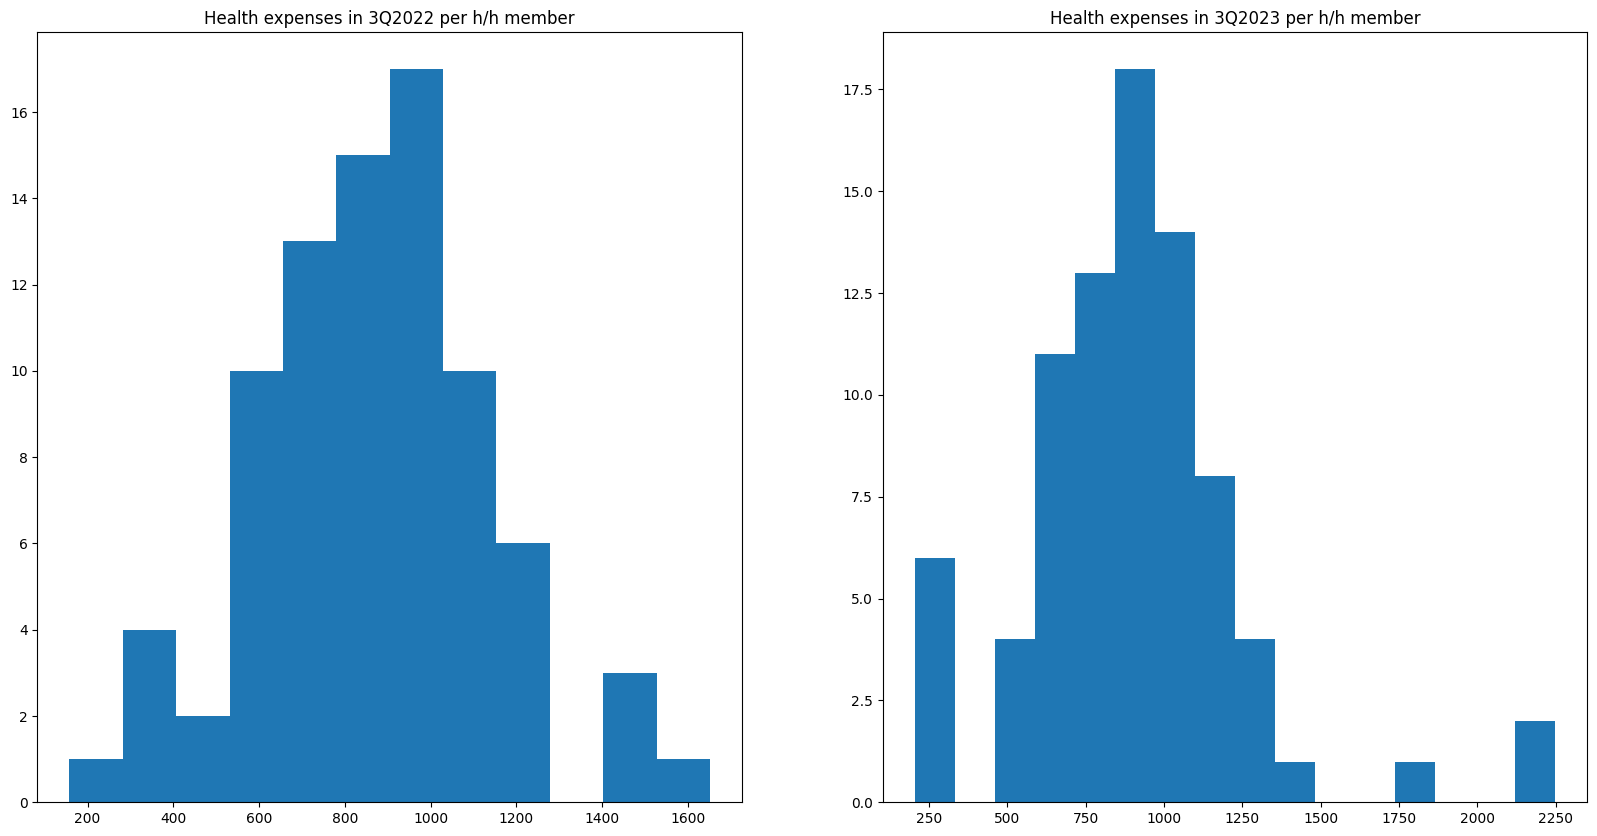

In [4]:
# Create a 2x2 subplot grid
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Titles and data for each subplot
titles = ['Health expenses in 3Q2022 per h/h member', 
          'Health expenses in 3Q2023 per h/h member']

# First row: histograms with default bins
ax[0].set_title(titles[0])
ax[0].hist(data.health_3q2022, bins='auto')
ax[1].set_title(titles[1])
ax[1].hist(data.health_3q2023, bins='auto')


# Display the plot
plt.show()


IndexError: list index out of range

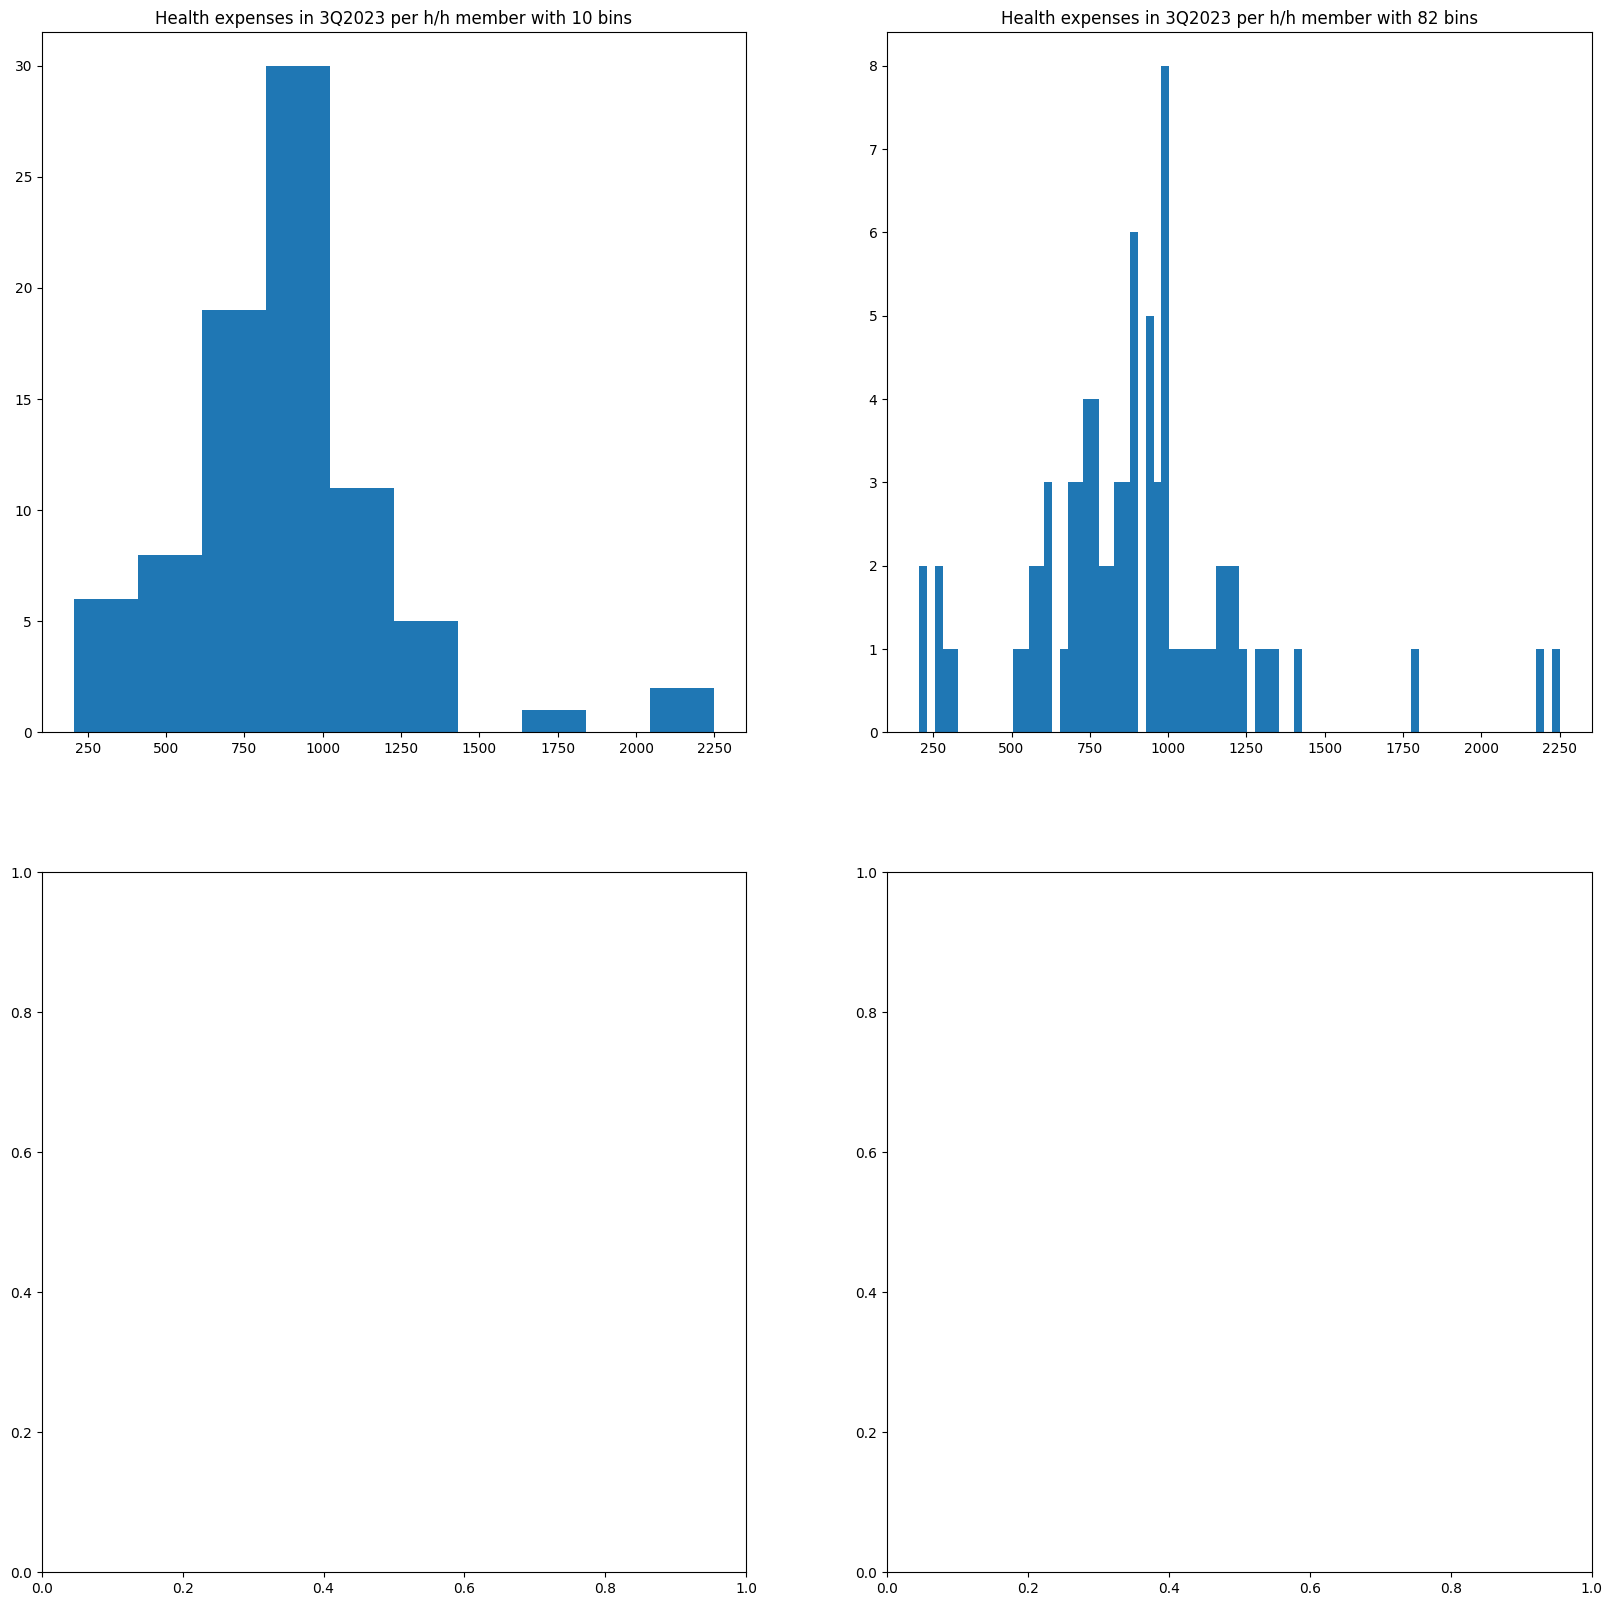

In [5]:
import matplotlib.pyplot as plt

# Create a new figure for the 4 histograms
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

# Title and data for the second dataset
title_2023 = 'Health expenses in 3Q2023 per h/h member'
data_2023 = data.health_3q2023
bins_list = [10, 82]  # Different numbers of bins

# Plot histograms using a for loop
for i, ax in enumerate(ax.flatten()):
    ax.set_title(f'{title_2023} with {bins_list[i]} bins')
    ax.hist(data_2023, bins=bins_list[i])

# Display the plot
plt.show()

In [24]:
data['ln_health_3q2022'] = np.log(data.health_3q2022)
data['ln_health_3q2023'] = np.log(data.health_3q2023)
data

,expense_3q2022,expense_3q2023,healthP_3q2022,healthP_3q2023,health_3q2022,health_3q2023,ln_health_3q2022,ln_health_3q2023
region,,,,,,,,
Белгородская область,21914.398,25241.122,2.568850,2.994974,562.948,755.965,6.333187,6.627995
Брянская область,18265.001,19635.899,2.933966,3.079054,535.889,604.600,6.283927,6.404567
Владимирская область,19813.828,23137.913,3.588756,3.879473,711.070,897.629,6.566771,6.799757
Воронежская область,17621.889,19502.166,4.558280,4.991471,803.255,973.445,6.688672,6.880841
Ивановская область,21681.452,23090.981,4.420234,5.235269,958.371,1208.875,6.865235,7.097445
...,...,...,...,...,...,...,...,...
Амурская область,19586.108,21720.673,5.966755,3.962138,1168.655,860.603,7.063609,6.757633
Магаданская область,36153.698,64866.434,3.411275,1.548055,1233.302,1004.168,7.117450,6.911915
Сахалинская область,32652.890,32761.952,3.462753,4.333130,1130.689,1419.618,7.030582,7.258143


(array([ 6.,  8., 19., 30., 11.,  5.,  0.,  1.,  0.,  2.]),
 array([ 205.33  ,  409.7637,  614.1974,  818.6311, 1023.0648, 1227.4985,
        1431.9322, 1636.3659, 1840.7996, 2045.2333, 2249.667 ]),
 <BarContainer object of 10 artists>)

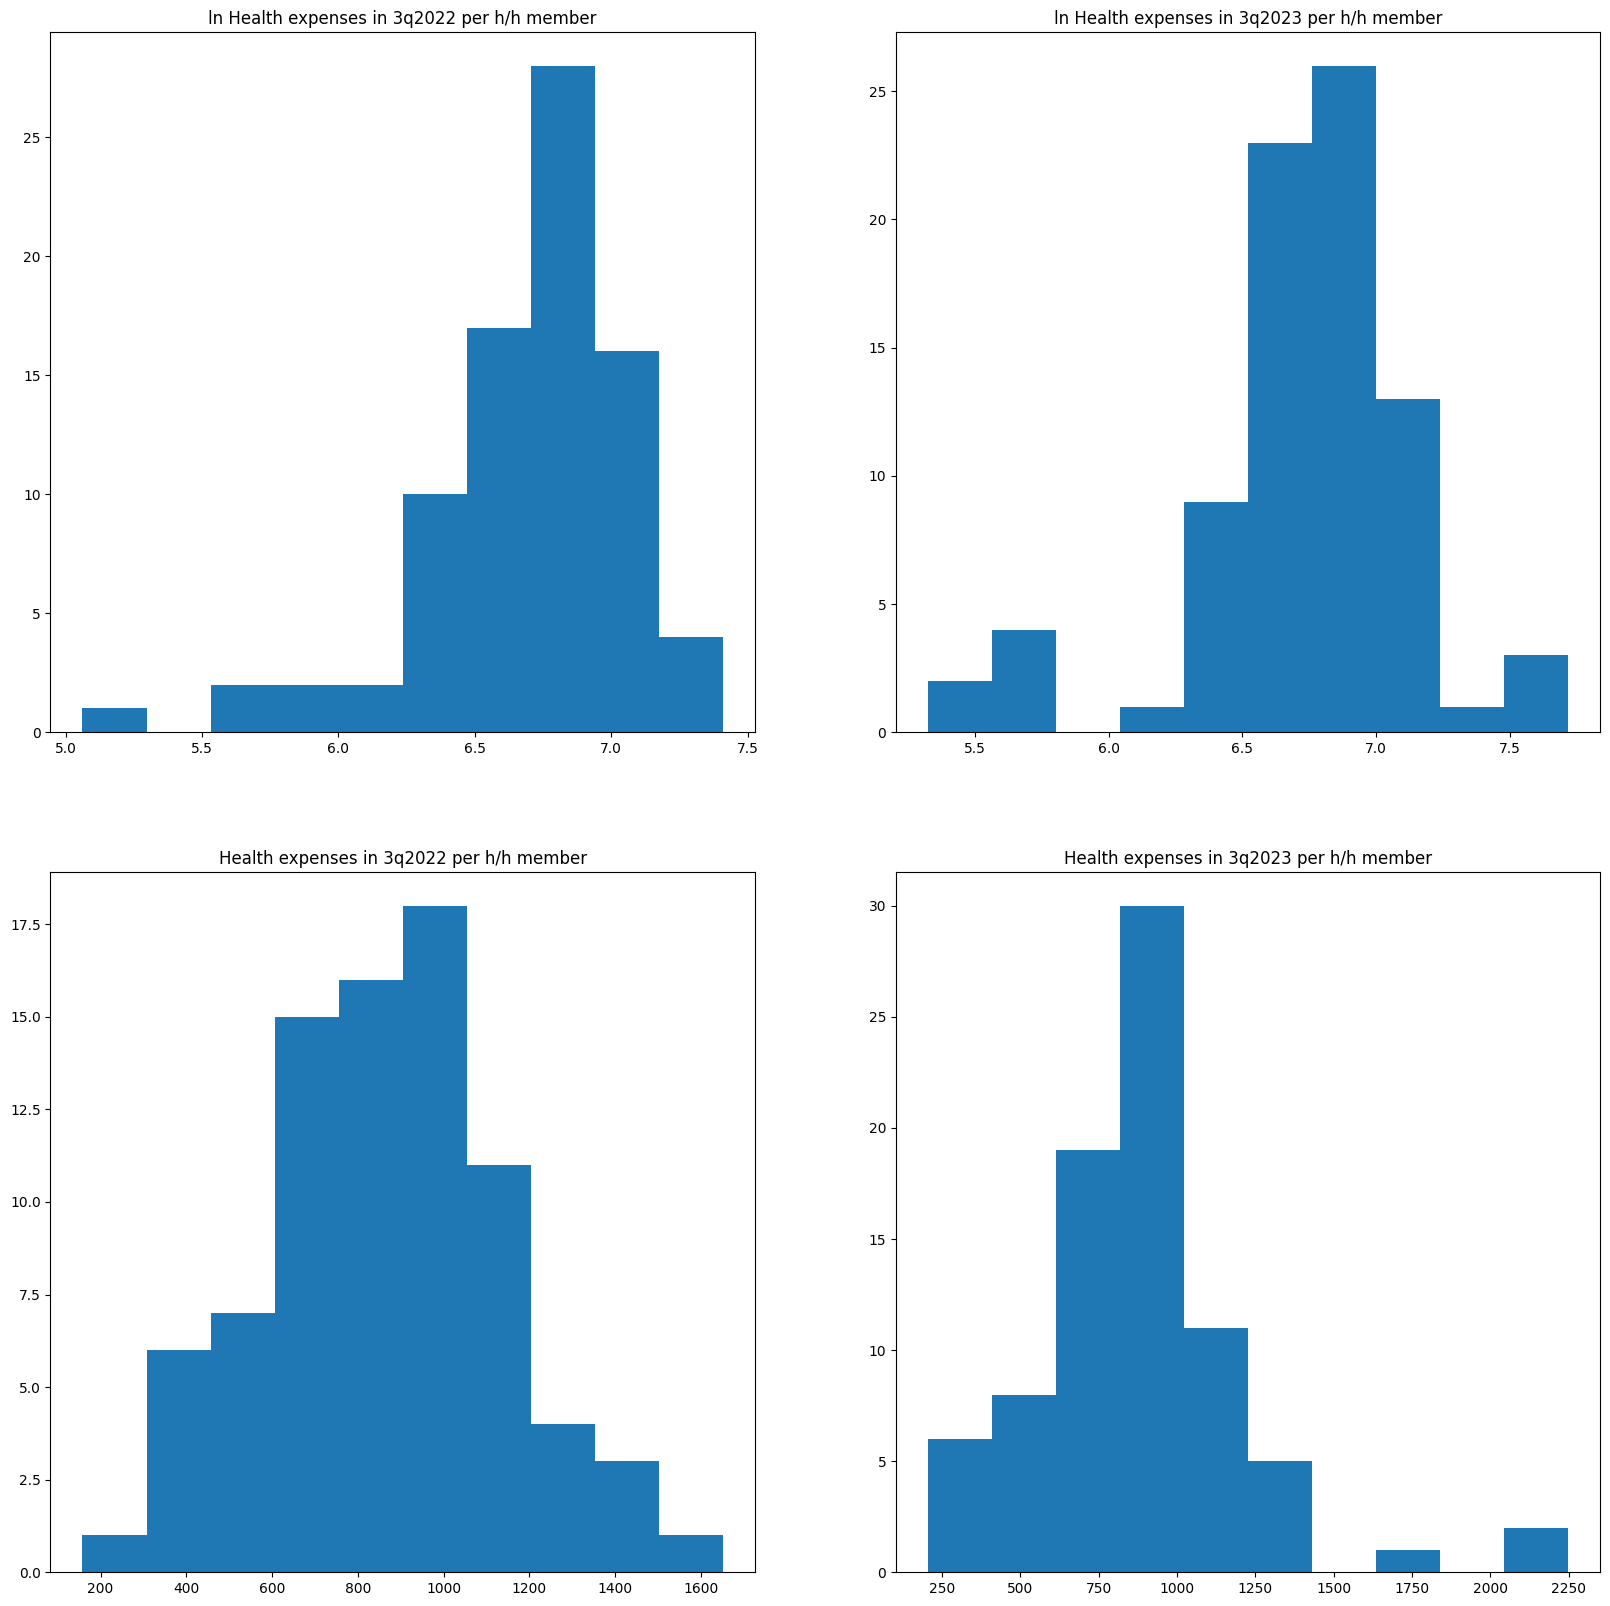

In [26]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax[0,0].set_title('ln Health expenses in 3q2022 per h/h member')
ax[0,0].hist(data.ln_health_3q2022)
ax[0,1].set_title('ln Health expenses in 3q2023 per h/h member')
ax[0,1].hist(data.ln_health_3q2023)

ax[1,0].set_title('Health expenses in 3q2022 per h/h member')
ax[1,0].hist(data.health_3q2022)
ax[1,1].set_title('Health expenses in 3q2023 per h/h member')
ax[1,1].hist(data.health_3q2023)

In [28]:
def calculate_statistics(data):
    mean = np.mean(data)
    sample_variance_ub = np.var(data, ddof=1)  # unbiased variance
    sample_variance_b = np.var(data, ddof=0)   # biased variance
    return mean, sample_variance_ub, sample_variance_b

def print_statistics(year, mean, sample_variance_ub, sample_variance_b):
    print(f'Health {year} Statistics:')
    print(f'{"Mean:":<35} {mean:.2f}')
    print(f'{"Unbiased Sample Variance:":<35} {sample_variance_ub:.2f}')
    print(f'{"Biased Sample Variance:":<35} {sample_variance_b:.2f}')
    print('-' * 50)

data_dict = {
    '3Q2022': data.health_3q2022,
    '3Q2023': data.health_3q2023
}

for year, health_data in data_dict.items():
    mean, sample_variance_ub, sample_variance_b = calculate_statistics(health_data)
    print_statistics(year, mean, sample_variance_ub, sample_variance_b)

Health 3Q2022 Statistics:
Mean:                               862.43
Unbiased Sample Variance:           76571.87
Biased Sample Variance:             75638.07
--------------------------------------------------
Health 3Q2023 Statistics:
Mean:                               896.12
Unbiased Sample Variance:           121458.80
Biased Sample Variance:             119977.59
--------------------------------------------------


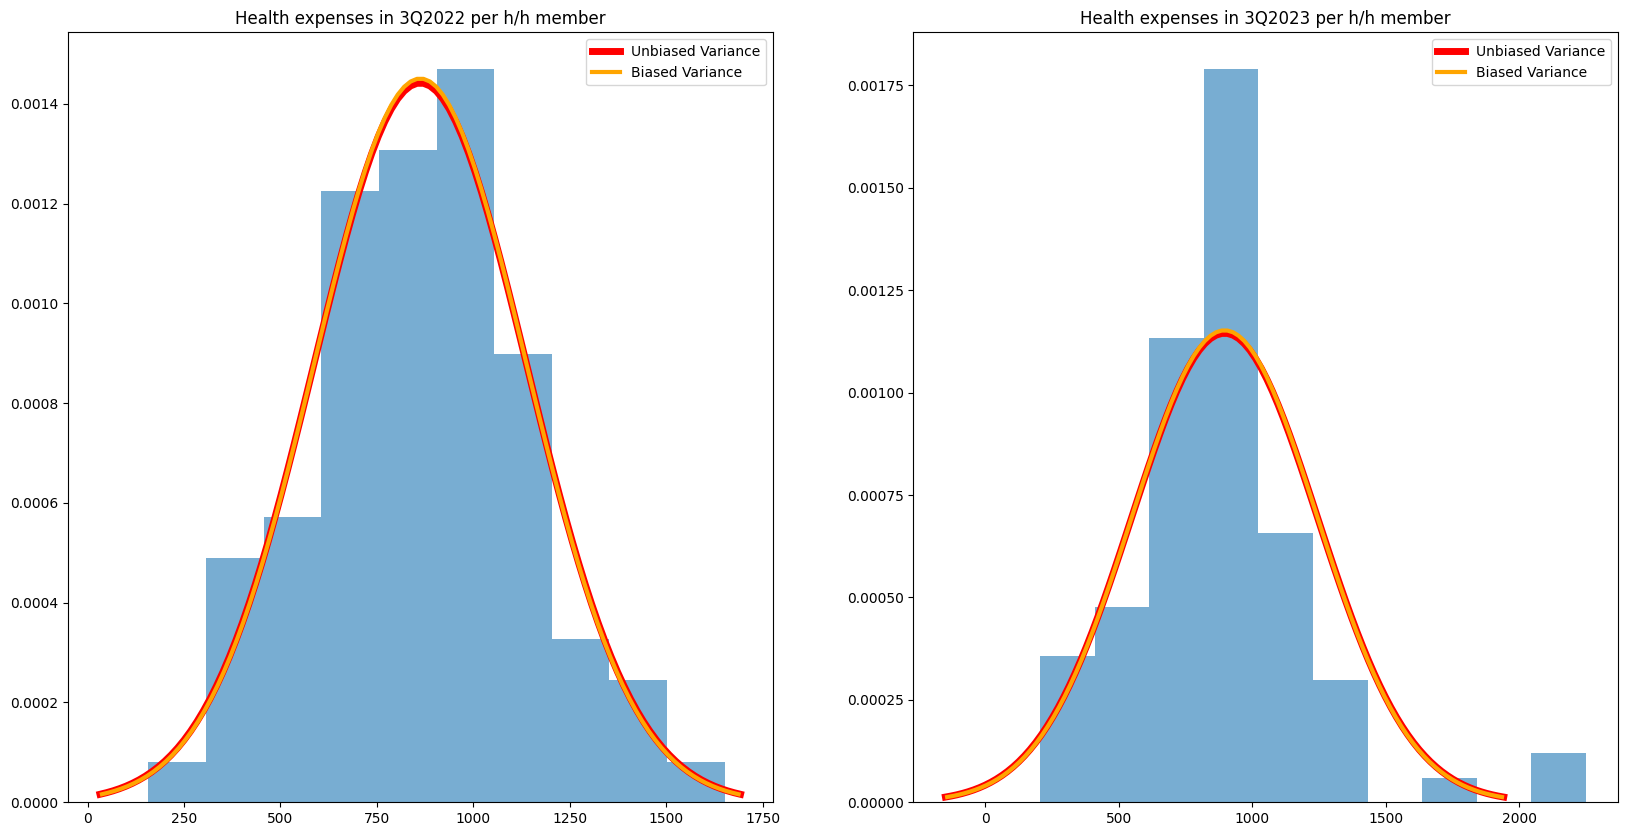

In [29]:
# Function to calculate x range for plotting
def calculate_x_range(mean, variance, num_points=100):
    std_dev = np.sqrt(variance)
    return np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, num_points)

# Function to plot histogram and normal distribution
def plot_histogram_with_distribution(ax, title, data, mean, variance_ub, variance_b):
    ax.set_title(title)
    ax.hist(data, density=True, alpha=0.6)
    
    x_ub = calculate_x_range(mean, variance_ub)
    ax.plot(x_ub, stats.norm.pdf(x_ub, mean, np.sqrt(variance_ub)), color='red', linewidth=5, label='Unbiased Variance')
    
    x_b = calculate_x_range(mean, variance_b)
    ax.plot(x_b, stats.norm.pdf(x_b, mean, np.sqrt(variance_b)), color='orange', linewidth=3, label='Biased Variance')
    
    ax.legend()

# Calculate statistics for each dataset
mean_2022, variance_2022_ub, variance_2022_b = calculate_statistics(data.health_3q2022)
mean_2023, variance_2023_ub, variance_2023_b = calculate_statistics(data.health_3q2023)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot data with distributions
plot_histogram_with_distribution(ax[0], 'Health expenses in 3Q2022 per h/h member', data.health_3q2022, mean_2022, variance_2022_ub, variance_2022_b)
plot_histogram_with_distribution(ax[1], 'Health expenses in 3Q2023 per h/h member', data.health_3q2023, mean_2023, variance_2023_ub, variance_2023_b)

# Display the plot
plt.show()

In [32]:
#Maximum Likelihood Estimation (MLE) Method 

distribution = stats.norm
data_mle = data.health_3q2022
bounds = [(-10000000, 10000000), (-1000000, 1000000)] #set parameter bounds

mle = stats.fit(distribution, data_mle , bounds, method = 'mle') #mle is set by default

mle = stats.fit(distribution, data_mle, bounds, method='mle')

# Calculate statistics
mean = np.mean(data_mle)
variance_ub = np.var(data_mle, ddof=1)  # unbiased variance
variance_b = np.var(data_mle, ddof=0)   # biased variance
stdev_ub = np.sqrt(variance_ub)
stdev_b = np.sqrt(variance_b)

# Print the results in a nicely formatted way
print("Maximum Likelihood Estimation (MLE) Results:")
print(f"{'MLE Parameters:':<25} {mle}")

print("\nStatistics:")
print(f"{'Mean:':<25} {mean:.2f}")
print(f"{'Unbiased Variance:':<25} {variance_ub:.2f}")
print(f"{'Biased Variance:':<25} {variance_b:.2f}")
print(f"{'Unbiased Std Dev:':<25} {stdev_ub:.2f}")
print(f"{'Biased Std Dev:':<25} {stdev_b:.2f}")

Maximum Likelihood Estimation (MLE) Results:
MLE Parameters:             params: FitParams(loc=np.float64(862.4305829957775), scale=np.float64(275.02727225479344))
 success: True
 message: 'Optimization terminated successfully.'

Statistics:
Mean:                     862.43
Unbiased Variance:        76571.87
Biased Variance:          75638.07
Unbiased Std Dev:         276.72
Biased Std Dev:           275.02


In [11]:
##Confidence interval for mean
#Variance is known, var = 120 000

def ci_mean_z(data, confidence_level, sigma2):
    mean = np.mean(data)
    stdev = np.sqrt(sigma2)
    n = len(data)
    z_quantile = stats.norm.ppf(confidence_level + (1 - confidence_level)/2)

    lower_bound = mean - z_quantile * stdev / np.sqrt(n)
    upper_bound = mean + z_quantile * stdev / np.sqrt(n)

    return print('confidence interval is', lower_bound, upper_bound,
                 '\nconfidence level is', confidence_level,
                 '\nz_quantile is', z_quantile)

ci_mean_z(data.health_3q2022, 0.95, 120000)

confidence interval is 787.4560758130608 937.4113632113294 
confidence level is 0.95 
z_quantile is 1.959963984540054


In [12]:
#Confidence interval for mean using statsmodels
#Variance is known, var = 120 000

ci_z = stats.norm.interval(confidence = 0.95, loc = np.mean(data.health_3q2022), scale = np.sqrt(120000)/np.sqrt(len(data)))

print('confidence interval is', ci_z)


confidence interval is (787.4560758130608, 937.4113632113294)


In [13]:
#Confidence interval for mean
#Unknown Variance

def ci_mean_t(data, confidence_level):
    mean = np.mean(data)
    stdev = np.sqrt(np.var(data, ddof = 1))
    n = len(data)
    t_quantile = stats.t.ppf(confidence_level + (1 - confidence_level)/2, df = n - 1)

    lower_bound = mean - t_quantile * stdev / np.sqrt(n)
    upper_bound = mean + t_quantile * stdev / np.sqrt(n)

    return print('confidence interval is', lower_bound, upper_bound,
                 '\nconfidence level is', confidence_level,
                 '\nt_quantile is', t_quantile)

ci_mean_t(data.health_3q2022, 0.95)

confidence interval is 801.6324963697044 923.2349426546858 
confidence level is 0.95 
t_quantile is 1.9896863232444828


In [14]:
#Confidence interval for mean using statsmodels
#Unknown Variance

ci_t = stats.t.interval(confidence = 0.95, 
                        df = len(data.health_3q2022) - 1, 
                        loc = np.mean(data.health_3q2022), 
                        scale = np.sqrt(np.var(data.health_3q2022, ddof = 1))/np.sqrt(len(data)))

print('confidence interval is', ci_t)

confidence interval is (801.6324963697044, 923.2349426546858)


In [15]:
#Confidence interval for mean difference. Unknown but equal variances.

def ci_meandiff_uknown_eqvar(data_x, data_y, confidence_level):
    
            # X sample
            mean_x = np.mean(data_x)
            stdev_x = np.sqrt(np.var(data_x, ddof = 1))
            n_x = len(data_x)
    
            # Y sample
            mean_y = np.mean(data_y)
            stdev_y = np.sqrt(np.var(data_y, ddof = 1))
            n_y = len(data_y)
    
            # X + Y Variance
            s2 = ((n_x - 1) * stdev_x**2 + (n_y - 1) * stdev_y**2) / (n_x + n_y - 2)
    
            t_quantile = stats.t.ppf(confidence_level + (1 - confidence_level)/2, df = n_x + n_y - 2)
    
            # Confidence interval
            lower_bound = mean_x - mean_y - t_quantile * np.sqrt(s2) * np.sqrt((n_x + n_y) / (n_x * n_y))
            upper_bound = mean_x - mean_y + t_quantile * np.sqrt(s2) * np.sqrt((n_x + n_y) / (n_x * n_y))

            return print('conf_level is', confidence_level,
                         '\nt_quantile is', t_quantile,
                         '\nconfidence interval is', lower_bound, upper_bound)

ci_meandiff_uknown_eqvar(data.health_3q2022, data.health_3q2023, 0.95)

conf_level is 0.95 
t_quantile is 1.9747157859171878 
confidence interval is -130.7298314120306 63.35602653398253


H_0: mu = 1000 
Observed statistic -3.5960713346123194 
H_A: mu != 1000 
crit_value_2s = 1.959963984540054 
alpha/2 = 0.025 
p-value = 0.0 
H_a: mu < 1000 
crit_value_lhs = -1.6448536269514729 
alpha = 0.05 
p-value = 0.0 
H_a: mu > 1000 
crit_value_rhs = 1.6448536269514722 
alpha = 0.05 
p-value = 1.0


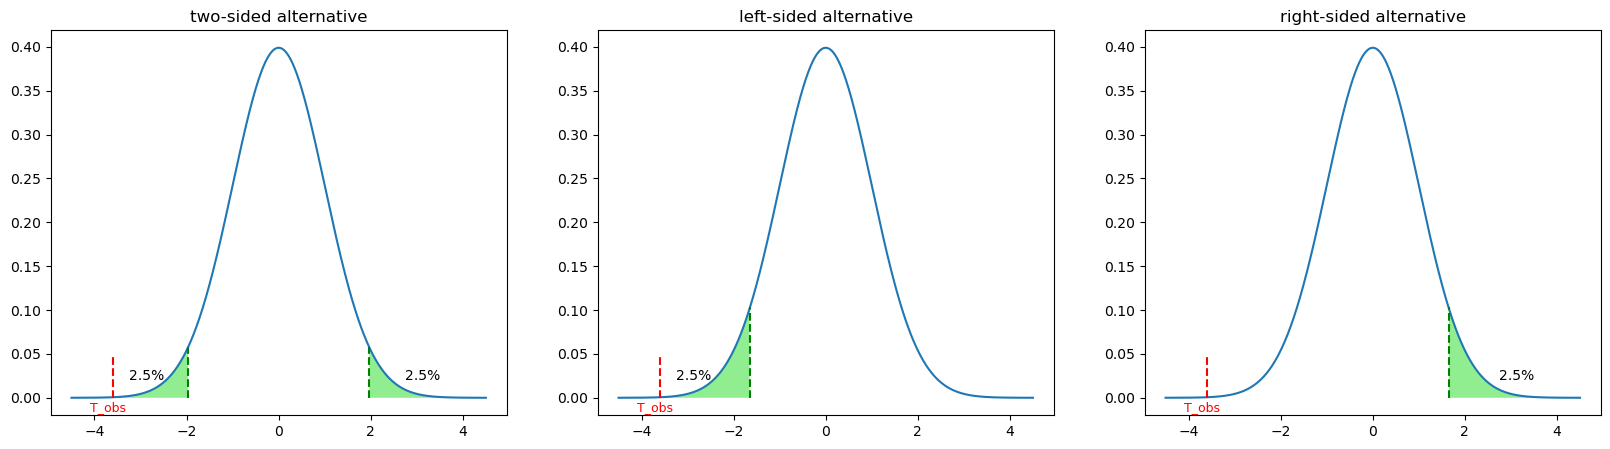

In [16]:
#Hypothesis testing, mean with known variance

def hyp_mean_z(data, mu, sigma2, alpha):
    mean = np.mean(data)
    stdev = np.sqrt(sigma2)
    n = len(data)
    
    T_obs = (mean - mu) / (stdev/np.sqrt(n))

    if T_obs < 0:
        p_value = stats.norm.cdf(T_obs)
    else:
        p_value = 1 - stats.norm.cdf(T_obs)
        
    p_value_lhs = stats.norm.cdf(T_obs)
    p_value_rhs = 1 - stats.norm.cdf(T_obs)
    
    crit_value_2s = stats.norm.ppf(1 - alpha/2) #two-sided alternative
    crit_value_lhs = stats.norm.ppf(alpha)      #left-sided alternative
    crit_value_rhs = stats.norm.ppf(1 - alpha)  #right-sided alternative

    x = np.linspace(-4.5, 4.5, 1000)
    y = stats.norm.pdf(x, loc = 0, scale = 1)
    fig, ax = plt.subplots(1, 3, figsize = (20, 5))
    ax[0].set_title('two-sided alternative')
    ax[0].plot(x , y)
    ax[0].vlines(x = crit_value_2s, ymin = 0, ymax = stats.norm.pdf(crit_value_2s), linestyles = 'dashed', color = 'green')
    ax[0].vlines(x = -crit_value_2s, ymin = 0, ymax = stats.norm.pdf(crit_value_2s), linestyles = 'dashed', color = 'green')
    ax[0].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= -crit_value_2s), facecolor='lightgreen')
    ax[0].fill_between(x, 0, y, where=(np.array(x) > crit_value_2s) & (np.array(x) <= max(x)), facecolor='lightgreen')
    ax[0].text(2.75, 0.02, '2.5%')
    ax[0].text(-3.25, 0.02, '2.5%')
    ax[0].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
    ax[0].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')

    ax[1].set_title('left-sided alternative')
    ax[1].plot(x , y)
    ax[1].vlines(x = crit_value_lhs, ymin = 0, ymax = stats.norm.pdf(crit_value_lhs), linestyles = 'dashed', color = 'green')
    ax[1].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= crit_value_lhs), facecolor='lightgreen')
    ax[1].text(-3.25, 0.02, '2.5%')
    ax[1].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
    ax[1].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')

    ax[2].set_title('right-sided alternative')
    ax[2].plot(x , y)
    ax[2].vlines(x = crit_value_rhs, ymin = 0, ymax = stats.norm.pdf(crit_value_rhs), linestyles = 'dashed', color = 'green')
    ax[2].fill_between(x, 0, y, where=(np.array(x) > crit_value_rhs) & (np.array(x) <= max(x)), facecolor='lightgreen')
    ax[2].text(2.75, 0.02, '2.5%')
    ax[2].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
    ax[2].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')

    return print('H_0: mu =', mu,
                 '\nObserved statistic', T_obs,
                 '\nH_A: mu !=', mu,
                 '\ncrit_value_2s =', crit_value_2s,
                 '\nalpha/2 =', alpha/2,
                 '\np-value =', round(p_value, 2),
                 '\nH_a: mu <', mu,
                 '\ncrit_value_lhs =', crit_value_lhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_lhs, 2),
                 '\nH_a: mu >', mu,
                 '\ncrit_value_rhs =', crit_value_rhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_rhs, 2))
                 
hyp_mean_z(data.health_3q2022, 1000, 120000, 0.05)

H_0: mu = 1000 
Observed statistic -4.501780271504372 
H_A: mu != 1000 
crit_value_2s = 1.9896863232444828 
alpha/2 = 0.025 
p-value = 0.0 
H_a: mu < 1000 
crit_value_lhs = -1.663883912866253 
alpha = 0.05 
p-value = 0.0 
H_a: mu > 1000 
crit_value_rhs = 1.6638839128662524 
alpha = 0.05 
p-value = 1.0


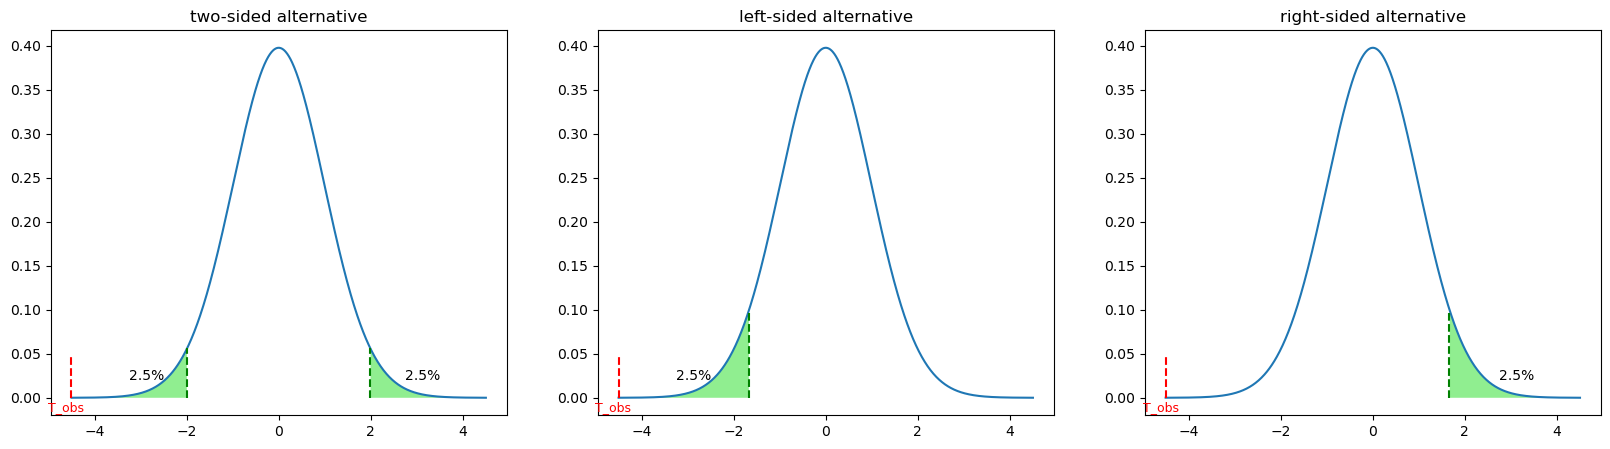

In [17]:
#Hypothesis testing, mean with unknown variance

def hyp_mean_t(data, mu, alpha):
    mean = np.mean(data)
    stdev = np.sqrt(np.var(data, ddof = 1))
    n = len(data)
    
    T_obs = (mean - mu) / (stdev/np.sqrt(n))

    if T_obs < 0:
        p_value = stats.t.cdf(T_obs, df = n - 1)
    else:
        p_value = 1 - stats.t.cdf(T_obs, df = n - 1)
        
    p_value_lhs = stats.t.cdf(T_obs, df = n - 1)
    p_value_rhs = 1 - stats.t.cdf(T_obs, df = n - 1)
    
    crit_value_2s = stats.t.ppf(1 - alpha/2, df = n - 1) #two-sided alternative
    crit_value_lhs = stats.t.ppf(alpha, df = n - 1)      #left-sided alternative
    crit_value_rhs = stats.t.ppf(1 - alpha, df = n - 1)  #right-sided alternative

    x = np.linspace(-4.5, 4.5, 1000)
    y = stats.t.pdf(x, df = n - 1, loc = 0, scale = 1)
    fig, ax = plt.subplots(1, 3, figsize = (20, 5))
    ax[0].set_title('two-sided alternative')
    ax[0].plot(x , y)
    ax[0].vlines(x = crit_value_2s, ymin = 0, ymax = stats.t.pdf(crit_value_2s, df = n - 1), linestyles = 'dashed', color = 'green')
    ax[0].vlines(x = -crit_value_2s, ymin = 0, ymax = stats.t.pdf(crit_value_2s, df = n - 1), linestyles = 'dashed', color = 'green')
    ax[0].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= -crit_value_2s), facecolor='lightgreen')
    ax[0].fill_between(x, 0, y, where=(np.array(x) > crit_value_2s) & (np.array(x) <= max(x)), facecolor='lightgreen')
    ax[0].text(2.75, 0.02, '2.5%')
    ax[0].text(-3.25, 0.02, '2.5%')
    ax[0].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
    ax[0].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')

    ax[1].set_title('left-sided alternative')
    ax[1].plot(x , y)
    ax[1].vlines(x = crit_value_lhs, ymin = 0, ymax = stats.t.pdf(crit_value_lhs, df = n - 1), linestyles = 'dashed', color = 'green')
    ax[1].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= crit_value_lhs), facecolor='lightgreen')
    ax[1].text(-3.25, 0.02, '2.5%')
    ax[1].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
    ax[1].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')

    ax[2].set_title('right-sided alternative')
    ax[2].plot(x , y)
    ax[2].vlines(x = crit_value_rhs, ymin = 0, ymax = stats.t.pdf(crit_value_rhs, df = n - 1), linestyles = 'dashed', color = 'green')
    ax[2].fill_between(x, 0, y, where=(np.array(x) > crit_value_rhs) & (np.array(x) <= max(x)), facecolor='lightgreen')
    ax[2].text(2.75, 0.02, '2.5%')
    ax[2].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
    ax[2].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')

    return print('H_0: mu =', mu,
                 '\nObserved statistic', T_obs,
                 '\nH_A: mu !=', mu,
                 '\ncrit_value_2s =', crit_value_2s,
                 '\nalpha/2 =', alpha/2,
                 '\np-value =', round(p_value, 2),
                 '\nH_a: mu <', mu,
                 '\ncrit_value_lhs =', crit_value_lhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_lhs, 2),
                 '\nH_a: mu >', mu,
                 '\ncrit_value_rhs =', crit_value_rhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_rhs, 2))
                 
hyp_mean_t(data.health_3q2022, 1000, 0.05)

H_0: mu_x = mu_y 
Observed statistic -0.6854910371006705 
H_A: mu_x != mu_y 
crit_value_2s = 1.9747157859171878 
alpha/2 = 0.025 
p-value = 0.25 
H_a: mu_x < mu_y 
crit_value_lhs = -1.6543139565251872 
alpha = 0.05 
p-value = 0.25 
H_a: mu_x > mu_y 
crit_value_rhs = 1.6543139565251865 
alpha = 0.05 
p-value = 0.75


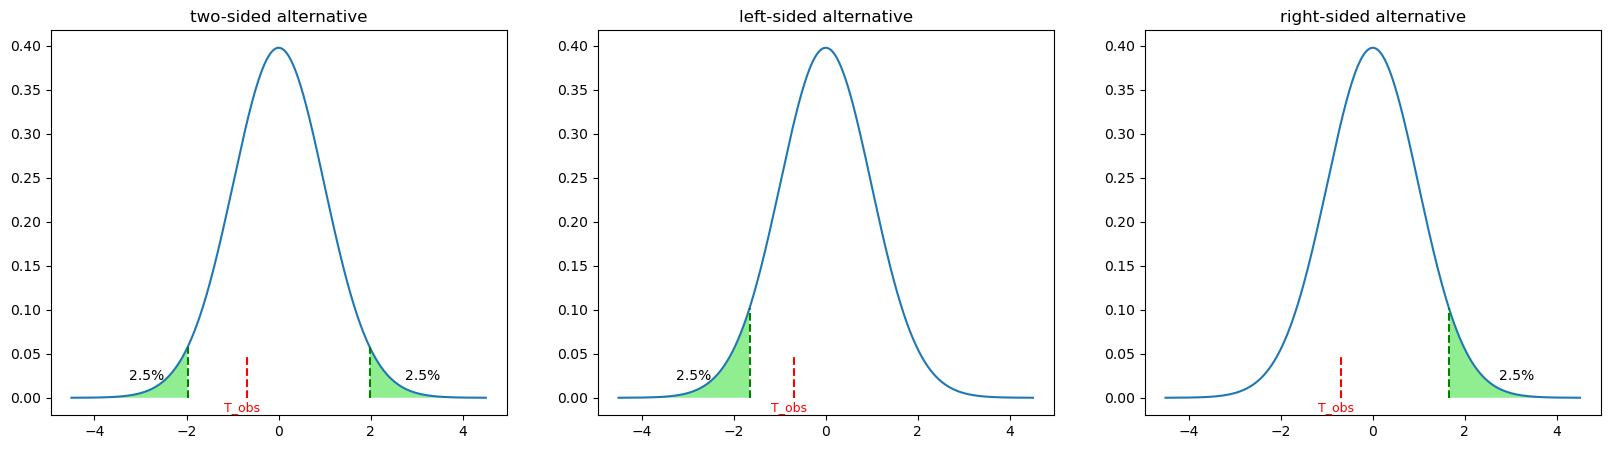

In [18]:
#Hypothesis testing: mean equality. Unknown but equal variances.

#mu_diff = mu_x - mu_y. 0 if mu_x = mu_y
#mu_diff > 0 means that mu_x > mu_y
#mu_diff < 0 mean that mu_x < mu_y

def hyp_eqmean_uknown_eqvar(data_x, data_y, mu_diff, alpha):
    
            # X sample
            mean_x = np.mean(data_x)
            stdev_x = np.sqrt(np.var(data_x, ddof = 1))
            n_x = len(data_x)
    
            # Y sample
            mean_y = np.mean(data_y)
            stdev_y = np.sqrt(np.var(data_y, ddof = 1))
            n_y = len(data_y)
    
            # X + Y Variance
            s2 = ((n_x - 1) * stdev_x**2 + (n_y - 1) * stdev_y**2) / (n_x + n_y - 2)
            df = n_x + n_y - 2
    
            T_obs = (mean_x - mean_y - mu_diff) / np.sqrt(s2 * ((n_x + n_y) / (n_x * n_y)))

            if T_obs < 0:
                p_value = stats.t.cdf(T_obs, df = df)
            else:
                p_value = 1 - stats.t.cdf(T_obs, df = df)
        
            p_value_lhs = stats.t.cdf(T_obs, df = df)
            p_value_rhs = 1 - stats.t.cdf(T_obs, df = df)
    
            crit_value_2s = stats.t.ppf(1 - alpha/2, df = df) #two-sided alternative
            crit_value_lhs = stats.t.ppf(alpha, df = df)      #left-sided alternative
            crit_value_rhs = stats.t.ppf(1 - alpha, df = df)  #right-sided alternative

            x = np.linspace(-4.5, 4.5, 1000)
            y = stats.t.pdf(x, df = n - 1, loc = 0, scale = 1)
            fig, ax = plt.subplots(1, 3, figsize = (20, 5))
            ax[0].set_title('two-sided alternative')
            ax[0].plot(x , y)
            ax[0].vlines(x = crit_value_2s, ymin = 0, ymax = stats.t.pdf(crit_value_2s, df = n - 1), linestyles = 'dashed', color = 'green')
            ax[0].vlines(x = -crit_value_2s, ymin = 0, ymax = stats.t.pdf(crit_value_2s, df = n - 1), linestyles = 'dashed', color = 'green')
            ax[0].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= -crit_value_2s), facecolor='lightgreen')
            ax[0].fill_between(x, 0, y, where=(np.array(x) > crit_value_2s) & (np.array(x) <= max(x)), facecolor='lightgreen')
            ax[0].text(2.75, 0.02, '2.5%')
            ax[0].text(-3.25, 0.02, '2.5%')
            ax[0].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
            ax[0].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')
        
            ax[1].set_title('left-sided alternative')
            ax[1].plot(x , y)
            ax[1].vlines(x = crit_value_lhs, ymin = 0, ymax = stats.t.pdf(crit_value_lhs, df = n - 1), linestyles = 'dashed', color = 'green')
            ax[1].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= crit_value_lhs), facecolor='lightgreen')
            ax[1].text(-3.25, 0.02, '2.5%')
            ax[1].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
            ax[1].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')
        
            ax[2].set_title('right-sided alternative')
            ax[2].plot(x , y)
            ax[2].vlines(x = crit_value_rhs, ymin = 0, ymax = stats.t.pdf(crit_value_rhs, df = n - 1), linestyles = 'dashed', color = 'green')
            ax[2].fill_between(x, 0, y, where=(np.array(x) > crit_value_rhs) & (np.array(x) <= max(x)), facecolor='lightgreen')
            ax[2].text(2.75, 0.02, '2.5%')
            ax[2].text(T_obs - 0.5, -0.015, 'T_obs', fontsize = 9, color = 'red')
            ax[2].vlines(x = T_obs, ymin = 0, ymax = 0.05, linestyles = 'dashed', color = 'red')

            return print('H_0: mu_x = mu_y',
                 '\nObserved statistic', T_obs,
                 '\nH_A: mu_x != mu_y',
                 '\ncrit_value_2s =', crit_value_2s,
                 '\nalpha/2 =', alpha/2,
                 '\np-value =', round(p_value, 2),
                 '\nH_a: mu_x < mu_y',
                 '\ncrit_value_lhs =', crit_value_lhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_lhs, 2),
                 '\nH_a: mu_x > mu_y',
                 '\ncrit_value_rhs =', crit_value_rhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_rhs, 2))

hyp_eqmean_uknown_eqvar(data.health_3q2022, data.health_3q2023, 0, 0.05)

H_0: sigma2 = 120000 
Observed statistic 51.68601246937122 
H_A: sigma2 != 120000 
crit_value_2s_lhs = 57.998416527399435 
crit_value_2s_rhs = 107.7834096653345 
alpha/2 = 0.025 
p-value_2s_lhs = 0.0 
p-value_2s_rhs = 1.0 
H_a: sigma2 < 120000 
crit_value_lhs = 61.261482371500676 
alpha = 0.05 
p-value = 0.0 
H_a: sigma2 > 120000 
crit_value_rhs = 103.00950871222618 
alpha = 0.05 
p-value = 1.0


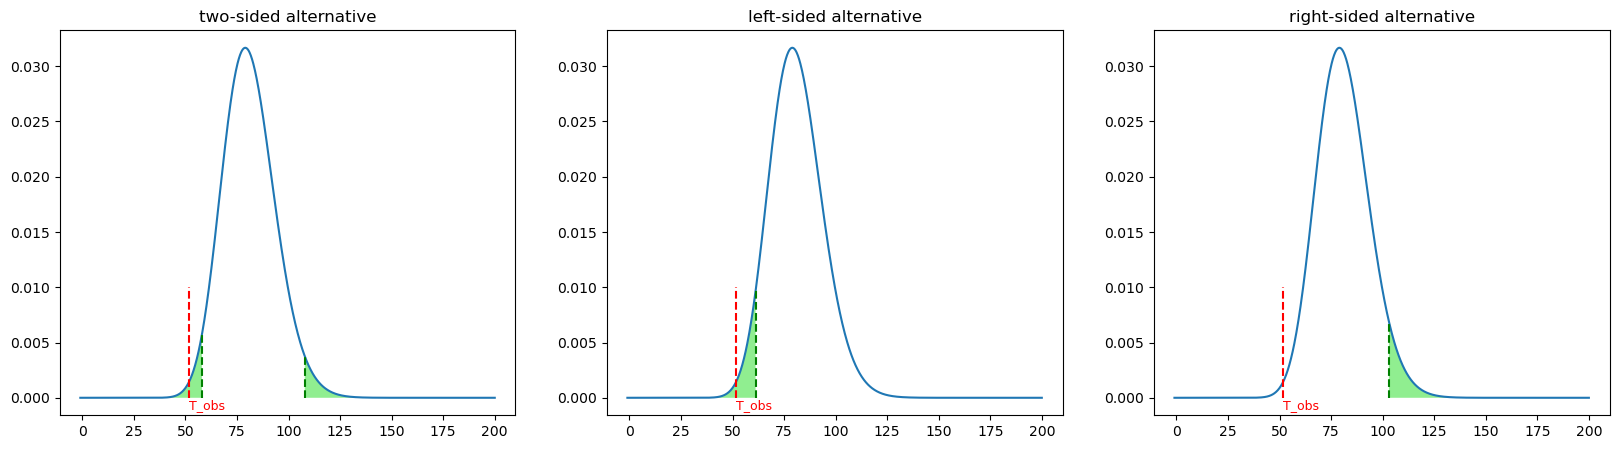

In [19]:
#Hypothesis testing: variance of normal population


def hyp_variance_chi2(data, variance_0, alpha):
    variance_ub = np.var(data, ddof = 1) #sample variance unbiased estimator
    n = len(data)
    
    T_obs = (n - 1) * variance_ub / variance_0
    df = n - 1

    p_value_lhs = stats.chi2.cdf(T_obs, df = df)
    p_value_rhs = 1 - stats.chi2.cdf(T_obs, df = df)
    
    crit_value_2s_lhs = stats.chi2.ppf(alpha/2, df = df) #two-sided alternative left
    crit_value_2s_rhs = stats.chi2.ppf(1 - alpha/2, df = df) #two-sided alternative right
    crit_value_lhs = stats.chi2.ppf(alpha, df = df)      #left-sided alternative
    crit_value_rhs = stats.chi2.ppf(1 - alpha, df = df)  #right-sided alternative

    x = np.linspace(-1, 200, 1000)
    y = stats.chi2.pdf(x, df)
    fig, ax = plt.subplots(1, 3, figsize = (20, 5))
    ax[0].set_title('two-sided alternative')
    ax[0].plot(x , y)
    ax[0].vlines(x = crit_value_2s_lhs, ymin = 0, ymax = stats.chi2.pdf(crit_value_2s_lhs, df = n - 1), linestyles = 'dashed', color = 'green')
    ax[0].vlines(x = crit_value_2s_rhs, ymin = 0, ymax = stats.chi2.pdf(crit_value_2s_rhs, df = n - 1), linestyles = 'dashed', color = 'green')
    ax[0].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= crit_value_2s_lhs), facecolor='lightgreen')
    ax[0].fill_between(x, 0, y, where=(np.array(x) > crit_value_2s_rhs) & (np.array(x) <= max(x)), facecolor='lightgreen')
    ax[0].text(T_obs, -0.001, 'T_obs', fontsize = 9, color = 'red')
    ax[0].vlines(x = T_obs, ymin = 0, ymax = 0.01, linestyles = 'dashed', color = 'red')

    ax[1].set_title('left-sided alternative')
    ax[1].plot(x , y)
    ax[1].vlines(x = crit_value_lhs, ymin = 0, ymax = stats.chi2.pdf(crit_value_lhs, df = n - 1), linestyles = 'dashed', color = 'green')
    ax[1].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= crit_value_lhs), facecolor='lightgreen')
    ax[1].text(T_obs, -0.001, 'T_obs', fontsize = 9, color = 'red')
    ax[1].vlines(x = T_obs, ymin = 0, ymax = 0.01, linestyles = 'dashed', color = 'red')

    ax[2].set_title('right-sided alternative')
    ax[2].plot(x , y)
    ax[2].vlines(x = crit_value_rhs, ymin = 0, ymax = stats.chi2.pdf(crit_value_rhs, df = n - 1), linestyles = 'dashed', color = 'green')
    ax[2].fill_between(x, 0, y, where=(np.array(x) > crit_value_rhs) & (np.array(x) <= max(x)), facecolor='lightgreen')
    ax[2].text(T_obs, -0.001, 'T_obs', fontsize = 9, color = 'red')
    ax[2].vlines(x = T_obs, ymin = 0, ymax = 0.01, linestyles = 'dashed', color = 'red')
              
    return print('H_0: sigma2 =', variance_0,
                 '\nObserved statistic', T_obs,
                 '\nH_A: sigma2 !=', variance_0,
                 '\ncrit_value_2s_lhs =', crit_value_2s_lhs,
                 '\ncrit_value_2s_rhs =', crit_value_2s_rhs,
                 '\nalpha/2 =', alpha/2,
                 '\np-value_2s_lhs =', round(p_value_lhs, 2),
                 '\np-value_2s_rhs =', round(p_value_rhs, 2),
                 '\nH_a: sigma2 <', variance_0,
                 '\ncrit_value_lhs =', crit_value_lhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_lhs, 2),
                 '\nH_a: sigma2 >', variance_0,
                 '\ncrit_value_rhs =', crit_value_rhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_rhs, 2))
                
hyp_variance_chi2(data.health_3q2022, 120000, 0.05)

H_0: sigma_x = sigma_y 
Observed statistic 0.630434953277205 
H_A: sigma_x != sigma_y 
crit_value_2s_lhs = 0.6923404722677363 
crit_value_2s_rhs = 1.444376054926467 
alpha/2 = 0.05 
p-value_lhs = 0.02 
p-value_rhs = 0.98 
H_a: sigma_x < sigma_y 
crit_value_lhs = 0.7511469583596881 
alpha = 0.1 
p-value = 0.02 
H_a: sigma_x > sigma_y 
crit_value_rhs = 1.33129740974222 
alpha = 0.1 
p-value = 0.98


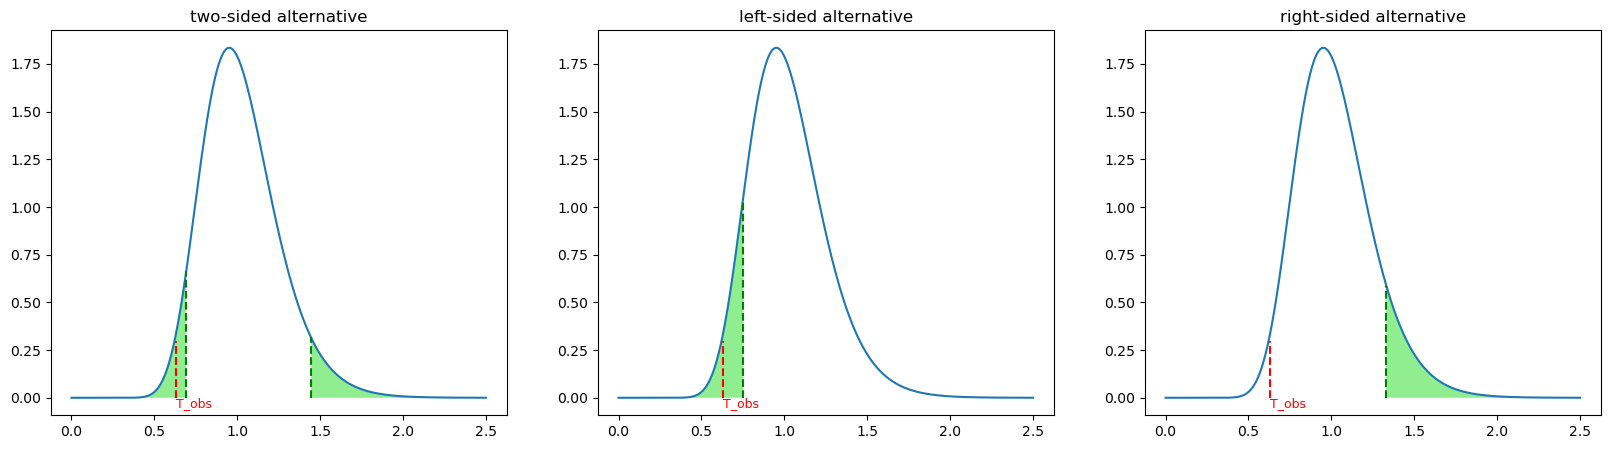

In [20]:
#Hypothesis testing: variance equality between two independent samples

#sigma_diff = sigma_x - sigma_y. 0 if sigma_x = sigma_y
#sigma_diff > 0 means that sigma_x > sigma_y
#sigma_diff < 0 mean that sigma_x < sigma_y

def hyp_eqvariance_uknown_mean(data_x, data_y, sigma_diff, alpha):
    
            # X sample
            variance_x = np.var(data_x, ddof = 1)
            n_x = len(data_x)
            dfn = n_x - 1
    
            # Y sample
            variance_y = np.var(data_y, ddof = 1)
            n_y = len(data_y)
            dfd = n_y -1
    
            T_obs = variance_x / variance_y
            
            p_value_lhs = stats.f.cdf(T_obs, dfn = n_x - 1, dfd = n_y - 1)
            p_value_rhs = 1 - stats.f.cdf(T_obs, dfn = n_x - 1, dfd = n_y - 1)
            
            crit_value_2s_lhs = stats.f.ppf(alpha/2, dfn = n_x - 1, dfd = n_y - 1) #two-sided alternative left
            crit_value_2s_rhs = stats.f.ppf(1 - alpha/2, dfn = n_x - 1, dfd = n_y - 1) #two-sided alternative right
            crit_value_lhs = stats.f.ppf(alpha, dfn = n_x - 1, dfd = n_y - 1)      #left-sided alternative
            crit_value_rhs = stats.f.ppf(1 - alpha, dfn = n_x - 1, dfd = n_y - 1)  #right-sided alternative   

            x = np.linspace(0, 2.5, 1000)
            y = stats.f.pdf(x, dfn, dfd)
            fig, ax = plt.subplots(1, 3, figsize = (20, 5))
            ax[0].set_title('two-sided alternative')
            ax[0].plot(x , y)
            ax[0].vlines(x = crit_value_2s_lhs, ymin = 0, ymax = stats.f.pdf(crit_value_2s_lhs, dfn, dfd), linestyles = 'dashed', color = 'green')
            ax[0].vlines(x = crit_value_2s_rhs, ymin = 0, ymax = stats.f.pdf(crit_value_2s_rhs, dfn, dfd), linestyles = 'dashed', color = 'green')
            ax[0].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= crit_value_2s_lhs), facecolor='lightgreen')
            ax[0].fill_between(x, 0, y, where=(np.array(x) > crit_value_2s_rhs) & (np.array(x) <= max(x)), facecolor='lightgreen')
            ax[0].text(T_obs, -0.05, 'T_obs', fontsize = 9, color = 'red')
            ax[0].vlines(x = T_obs, ymin = 0, ymax = 0.3, linestyles = 'dashed', color = 'red')
        
            ax[1].set_title('left-sided alternative')
            ax[1].plot(x , y)
            ax[1].vlines(x = crit_value_lhs, ymin = 0, ymax = stats.f.pdf(crit_value_lhs, dfn, dfd), linestyles = 'dashed', color = 'green')
            ax[1].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= crit_value_lhs), facecolor='lightgreen')
            ax[1].text(T_obs, -0.05, 'T_obs', fontsize = 9, color = 'red')
            ax[1].vlines(x = T_obs, ymin = 0, ymax = 0.3, linestyles = 'dashed', color = 'red')
        
            ax[2].set_title('right-sided alternative')
            ax[2].plot(x , y)
            ax[2].vlines(x = crit_value_rhs, ymin = 0, ymax = stats.f.pdf(crit_value_rhs, dfn, dfd), linestyles = 'dashed', color = 'green')
            ax[2].fill_between(x, 0, y, where=(np.array(x) > crit_value_rhs) & (np.array(x) <= max(x)), facecolor='lightgreen')
            ax[2].text(T_obs, -0.05, 'T_obs', fontsize = 9, color = 'red')
            ax[2].vlines(x = T_obs, ymin = 0, ymax = 0.3, linestyles = 'dashed', color = 'red')
   
            return print('H_0: sigma_x = sigma_y',
                 '\nObserved statistic', T_obs,
                 '\nH_A: sigma_x != sigma_y',
                 '\ncrit_value_2s_lhs =', crit_value_2s_lhs,
                 '\ncrit_value_2s_rhs =', crit_value_2s_rhs,
                 '\nalpha/2 =', alpha/2,
                 '\np-value_lhs =', round(p_value_lhs, 2),
                 '\np-value_rhs =', round(p_value_rhs, 2),
                 '\nH_a: sigma_x < sigma_y',
                 '\ncrit_value_lhs =', crit_value_lhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_lhs, 2),
                 '\nH_a: sigma_x > sigma_y',
                 '\ncrit_value_rhs =', crit_value_rhs,
                 '\nalpha =', alpha,
                 '\np-value =', round(p_value_rhs, 2))

hyp_eqvariance_uknown_mean(data.health_3q2022, data.health_3q2023, 0, 0.1)

In [21]:
#Correlation examples

#Numpy

np.corrcoef(data.health_3q2022, data.health_3q2023)

array([[1.        , 0.71457714],
       [0.71457714, 1.        ]])

In [22]:
#numpy wrong function

np.correlate(data.health_3q2022, data.health_3q2023)



array([68955175.998433])

In [23]:
# pandas

data['health_3q2022'].corr(data['health_3q2023'], method = 'pearson')

0.7145771421205602

In [24]:
# pandas

data['health_3q2022'].corr(data['health_3q2023'], method = 'spearman')

0.6658939280155853

In [25]:
# scipy

stats.pearsonr(data.health_3q2022, data.health_3q2023)

PearsonRResult(statistic=0.7145771421205602, pvalue=4.741118494881109e-14)

In [26]:
np.random.seed(444) 
cat = np.random.choice(a=[0, 1, 2, 3, 4, 5],  size=len(data),  p=[0.1, 0.2, 0.1, 0.2, 0.1, 0.3])
cat

array([5, 5, 4, 4, 0, 0, 1, 2, 1, 1, 5, 5, 2, 5, 3, 3, 1, 2, 5, 5, 0, 3,
       5, 3, 3, 5, 5, 5, 5, 4, 5, 1, 0, 0, 1, 5, 0, 5, 1, 5, 3, 5, 5, 5,
       5, 3, 3, 2, 0, 3, 2, 5, 0, 2, 1, 1, 3, 0, 2, 2, 3, 1, 5, 1, 3, 3,
       3, 5, 5, 5, 3, 0, 1, 5, 4, 0, 5, 1, 5, 5, 4, 2])

In [27]:
data['cat'] = cat
data

,region,expense_3q2022,expense_3q2023,healthP_3q2022,healthP_3q2023,health_3q2022,health_3q2023,ln_health_3q2022,ln_health_3q2023,cat
0,Белгородская область,21914.398,25241.122,2.568850,2.994974,562.948,755.965,6.333187,6.627995,5
1,Брянская область,18265.001,19635.899,2.933966,3.079054,535.889,604.600,6.283927,6.404567,5
2,Владимирская область,19813.828,23137.913,3.588756,3.879473,711.070,897.629,6.566771,6.799757,4
3,Воронежская область,17621.889,19502.166,4.558280,4.991471,803.255,973.445,6.688672,6.880841,4
4,Ивановская область,21681.452,23090.981,4.420234,5.235269,958.371,1208.875,6.865235,7.097445,0
...,...,...,...,...,...,...,...,...,...,...
77,Амурская область,19586.108,21720.673,5.966755,3.962138,1168.655,860.603,7.063609,6.757633,1
78,Магаданская область,36153.698,64866.434,3.411275,1.548055,1233.302,1004.168,7.117450,6.911915,5
79,Сахалинская область,32652.890,32761.952,3.462753,4.333130,1130.689,1419.618,7.030582,7.258143,5
80,Еврейская автономная область,21690.199,25686.048,4.416723,3.795769,957.996,974.983,6.864844,6.882420,4


In [28]:
# pandas

data['health_3q2022'].corr(data['cat'], method = 'pearson')

0.08784090072783135

In [29]:
# pandas

data['health_3q2022'].corr(data['cat'], method = 'spearman')

0.052563125253329256

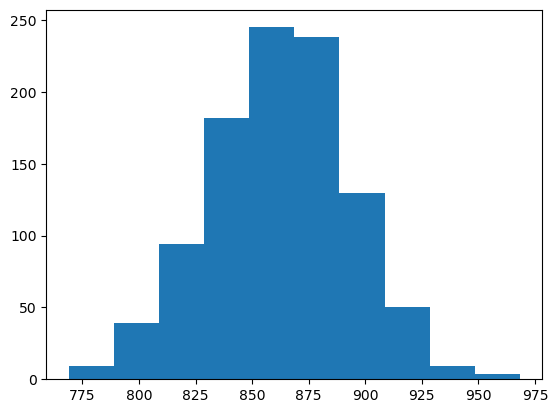

In [30]:
#Bootstraping

mean_bs = []
for i in range(1000):
    mean_bs.append(
        np.mean(data.sample(frac = 1, replace = True)['health_3q2022'])
    )
plt.hist(mean_bs)
plt.show()

In [31]:
np.mean(data.health_3q2022)

862.4337195121951

In [32]:
np.mean(mean_bs)

862.118361817073

In [33]:
#bootstrap confidence interval
mean_estimate = np.mean(mean_bs)
std_estimate = np.std(mean_bs, ddof = 1)

lower = stats.norm.ppf(0.025, loc = mean_estimate, scale = std_estimate)

upper = stats.norm.ppf(0.975, loc = mean_estimate, scale = std_estimate)

print(lower, upper)

802.1700584114627 922.0666652226834


In [34]:
ci_mean_t(data.health_3q2022, 0.95)

confidence interval is 801.6324963697044 923.2349426546858 
confidence level is 0.95 
t_quantile is 1.9896863232444828
